In [54]:
import numpy as np
import catppuccin
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(catppuccin.PALETTE.latte.identifier)

### Reelle datasett: Derivasjon (R/FYS)

Endring er veldig viktig i naturvitenskap. 

#### Numerisk derivasjon på et datasett

La oss ta et fysisk eksempel med ekte data om en terning som faller. Datasettet finner du [her](fallende_terning.csv). Datasettet er samlet inn ved hjelp av video og [Tracker](https://opensourcephysics.github.io/tracker-website/).

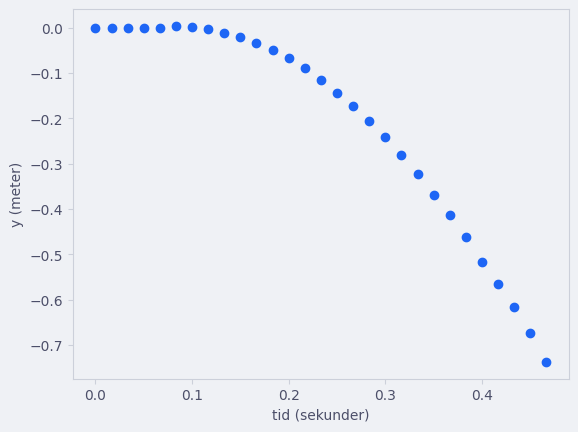

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fallende_terning.csv", decimal=".", delimiter=",")

t = df["t"]
y = df["y"]

plt.xlabel("tid (sekunder)")
plt.ylabel("y (meter)")
plt.scatter(t, y)
plt.show()

Hvis vi deriverer posisjonen så får vi farten til en gjenstand. Den deriverte kan vi finne numerisk ved å bruke gjennomsnittlig vekstfart $v_n=\frac{\Delta y}{\Delta t}=\frac{y_{n + 1} - y_{n}}{t_{n + 1} - t_{n}}$.

```{admonition} Tidssteg
:class: note

Innsamling av fysiske data er blant annet begrenset av hvor *fine* tidssteg vi har. Når jeg samlet inn data til dette eksperimentet filmet jeg med et kamera på $60$ FPS. Det betyr at det blir tatt $60$ bilder per sekund, noe som gjør at avstanden mellom hver tid blir $\frac{1}{60}\approx 0.0167$ sekunder.

Avstanden mellom hver måling i tid blir det samme som $dx$ i derivasjonen. Desto høyere FPS, desto bedre blir resultatet.
```


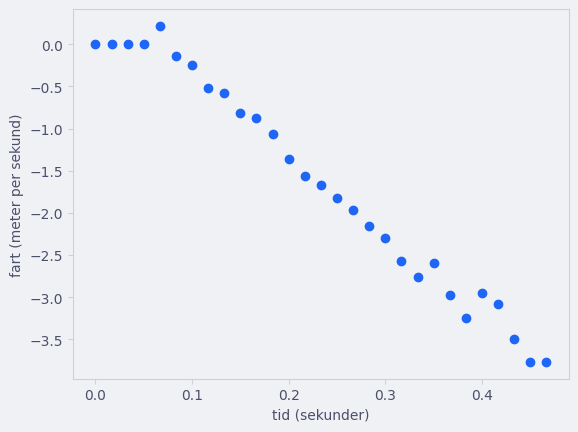

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fallende_terning.csv", decimal=".", delimiter=",")

t = df["t"]
y = df["y"]

v = []
for n in range(len(t) - 1): # Vi må stoppe før den siste verdien
    dy = y[n + 1] - y[n] # Endring i y-posisjon
    dt = t[n + 1] - t[n] # Endring i tid
    v.append(dy / dt)

# Ved å bruke fremoverdifferanse mangler vi den siste verdien.
# Da kan vi bruke bakoverdifferanse.
dy = y.iloc[-1] - y.iloc[-2]
dt = t.iloc[-1] - t.iloc[-2]
v.append(dy / dt)

plt.xlabel("tid (sekunder)")
plt.ylabel("fart (meter per sekund)")
plt.scatter(t, v)
plt.show()

Nå har vi derivert numerisk! Legg merke til at farten ser ut til å være ganske lineær. 

Før vi ser videre på den fysiske tolkningen, la oss se på en litt enklere metode for å finne numerisk derivert ved å bruke `np.gradient()`.

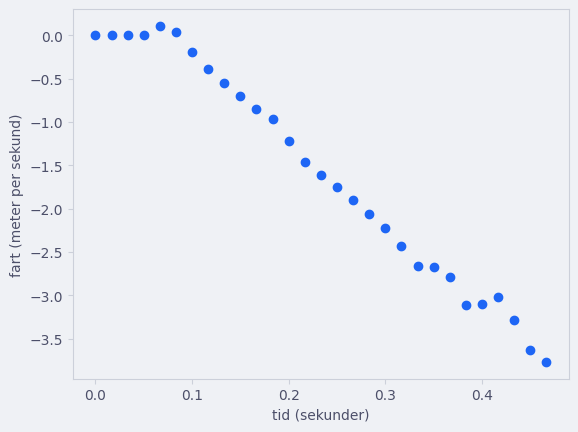

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fallende_terning.csv", decimal=".", delimiter=",")

t = df["t"]
y = df["y"]

v = np.gradient(y, t) # Derivert av y med hensyn på t

plt.xlabel("tid (sekunder)")
plt.ylabel("fart (meter per sekund)")
plt.scatter(t, v)
plt.show()

Det var mye enklere. Legg også merke til at vi får litt andre verdier. Disse verdiene er faktisk bedre approksimasjoner for den deriverte, fordi `np.gradient()` bruker sentraldifferanse på alle punktene i midten. 

#### En fysisk tolkning

Farten vi regnet ut så ganske lineær ut. Det er ikke så rart. En ting som faller fritt (uten luftmotsatnd) fra $y=0$ vil følge kurven $y(t)=-\frac{1}{2}gt^2$ der $g$ er en konstant som kalles for *tyngdeakselerasjonen*. Farten vil da bli gitt ved $v(t)=y'(t)=-gt$ som er en lineær funksjon. Dette har vi vist at stemmer ved å derivere numerisk!

La oss bruke regresjon for å finne en verdi for tyngdeakselerasjonen $g$. Hvis man slår opp tyngdeakselerasjonen på jorden får man $g\approx 9.81$. La oss se hvor godt vårt eksperiment passer.

Modellen vår finner en verdi for g = 6.2293999655329975 m/s^2


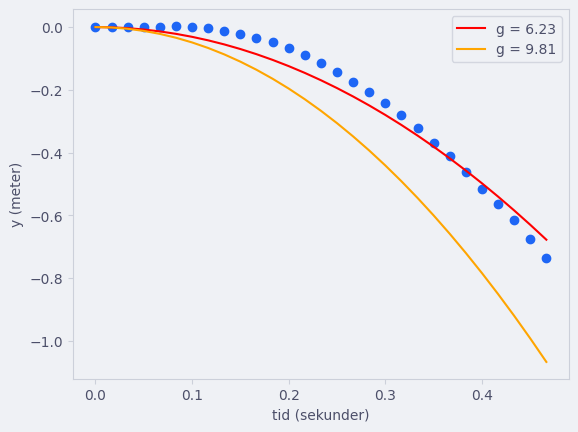

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("fallende_terning.csv", decimal=".", delimiter=",")

t = df["t"]
y = df["y"]

def modell_y(t, g):
    return - 0.5 * g * t **2

g = curve_fit(modell_y, t, y)[0][0]

print(f"Modellen vår finner en verdi for g = {g} m/s^2")

plt.scatter(t, y)
plt.plot(t, modell_y(t, g), label=f"g = {g:.2f}", color="red")
plt.plot(t, modell_y(t, 9.81), label=f"g = 9.81", color="orange")
plt.xlabel("tid (sekunder)")
plt.ylabel("y (meter)")
plt.legend()
plt.show()

```{admonition} Tenk
:class: task

Sammenlikn kurven for regresjon med kurven for oppslagsverdien $g\approx 9.81$. Hva kan være årsaken for at vi bommer så mye fra oppslagsverdien for $g$?
```

---

```{admonition} Utforsk din egen problemstilling.
:class: task

Finn data om et naturvitenskapelig fenomen eller lag dine egne data f.eks med [Tracker](https://opensourcephysics.github.io/tracker-website/) eller mobilappen *phyphox*.

Gjennomfør derivasjon og/eller regresjon for å si noe om fenomenet. Det kan for eksempel være

- Å finne en verdi for tyngdeakselerasjonen $g$ ved å sette opp et fysisk forsøk
- Sammenlikne ulike ting som faller for å verifisere at de faller med samme akselerasjon
- Undersøke smittespreding ved å se på COVID-tall.
- Undersøke data over globale temperaturer

... eller hva som helst annet som interesserer deg.
```